# Analyze in which documents we find budgetary values

In [2]:
import pandas as pd

df = pd.read_csv('20230529-output_budgetary_values_from_etendering_documents_using_simple_rules_and_classifier.csv', index_col=0)
df = df.drop(['is_contract_budget'], axis = 1)
df.tail()

notice_id                  doc_type  \
5998  290795-2020                Invitation   
5999  570462-2019                Invitation   
6000  432063-2017            Draft contract   
6001  595023-2020     Tender specifications   
6002  444531-2018  Technical specifications   

                                               doc_name value_extracted  \
5998    EN-02.+AA-010256-001-D+-+SECTION+B+-+TATOR.docx      eur 15000.   
5999  EN-02.+AA-010226-001-D+-+SECTION+B+-+TATOR+V2....      eur 10000.   
6000                              EN-4_AO_10677_FWC.doc          eur. 7   
6001  EN-2.+Tender-specifications-Part+1+Administrat...      eur 340600   
6002  EN-03-10-TCR1-Open+call+C4+automotive+statisti...         eur. 2.   

                                                context  \
5998  of any prefinancing instalments and/or interim...   
5999  of any prefinancing instalments and/or interim...   
6000  be added once the fwc is awarded. or local cur...   
6001  eur 1064000 (one million six hundred forty tho...   
6002  envisaged lifetime of the contract i.e. an ave...   

                               context_with_placeholder  \
5998  of any prefinancing instalments and/or interim...   
5999  of any prefinancing instalments and/or interim...   
6000  be added once the fwc is awarded. or local cur...   
6001  eur 1064000 (one million six hundred forty tho...   
6002  envisaged lifetime of the contract i.e. an ave...   

      is_contract_budget_confidence  
5998                       0.504436  
5999                       0.504436  
6000                       0.502470  
6001                       0.501368  
6002                       0.500900

In [3]:
df.describe()

is_contract_budget_confidence
count                    6003.000000
mean                        0.926812
std                         0.113627
min                         0.500900
25%                         0.923901
50%                         0.982302
75%                         0.991608
max                         0.998116

In [4]:
import matplotlib
import matplotlib.pyplot as plt

font = {'size': 22}
matplotlib.rc('font', **font)


def create_barplot_from_dict(dictionary, threshold):
    plt.figure(figsize=(24,10))
    plt.bar(dictionary.keys(), dictionary.values(), color='c', edgecolor='k', alpha=0.65)
    plt.axhline(y=threshold,linewidth=2, color='r')
    plt.xticks(rotation=45)



def count_elements_in_dataframe_from_columns(df, list_column_names):
    found_aggregation = dict()
    for _, row in df.iterrows():
        for column_name in list_column_names:
            if row[column_name]:
                if column_name not in found_aggregation:
                    found_aggregation[column_name] = 1
                else:
                    found_aggregation[column_name] = found_aggregation[column_name] + 1

    return found_aggregation

Text(0.5, 0, 'Document type')

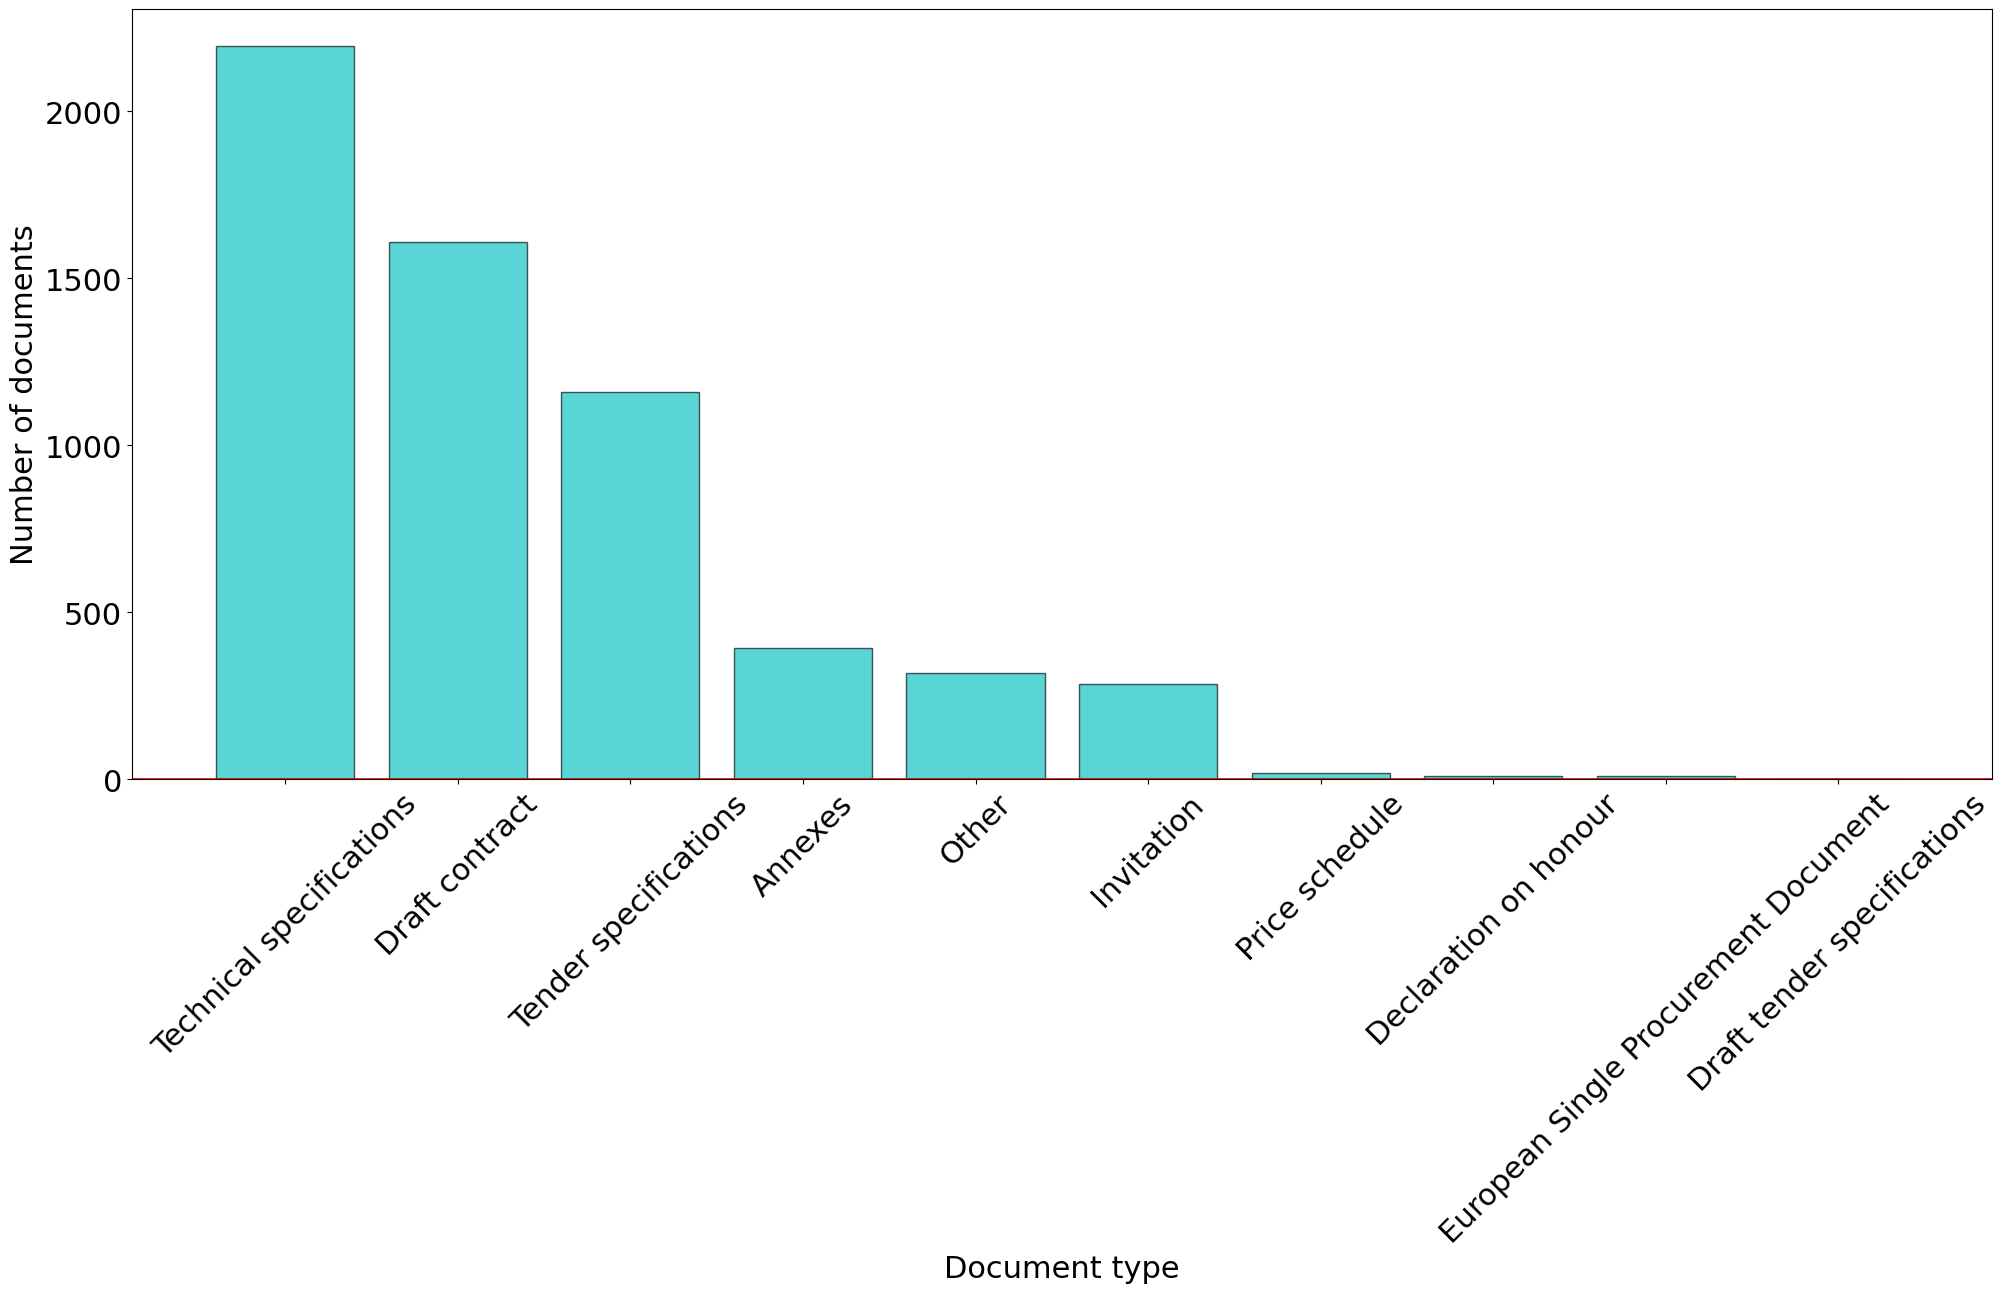

In [5]:
number_budgetary_value_by_doc_type = dict(df["doc_type"].value_counts())
create_barplot_from_dict(number_budgetary_value_by_doc_type, 0)
plt.ylabel("Number of documents")
plt.xlabel("Document type")

In [6]:
draft_tender_spec = df[df["doc_type"] == "Draft tender specifications"]
declaration_on_honour = df[df["doc_type"] == "Declaration on honour"]
price_schedule = df[df["doc_type"] == "Price schedule"]
european_single_proc_doc = df[df["doc_type"] == "European Single Procurement Document"]


In [7]:
draft_tender_spec.head()

notice_id                     doc_type  \
3002  344245-2021  Draft tender specifications   

                                               doc_name value_extracted  \
3002  EN-EU4Algae+Tender+Specifications+2021+OP+0001...      eur 900000   

                                                context  \
3002  the estimated maximum amount for the execution...   

                               context_with_placeholder  \
3002  the estimated maximum amount for the execution...   

      is_contract_budget_confidence  
3002                       0.982282

In [ ]:
draft_tender_spec[["notice_id", "doc_name", "context", "value_extracted", "is_contract_budget_confidence"]].to_csv("draft_tender_spec.csv")
declaration_on_honour[["notice_id", "doc_name", "context", "value_extracted", "is_contract_budget_confidence"]].to_csv("declaration_on_honour.csv")
price_schedule[["notice_id", "doc_name", "context", "value_extracted", "is_contract_budget_confidence"]].to_csv("price_schedule.csv")
european_single_proc_doc[["notice_id", "doc_name", "context", "value_extracted", "is_contract_budget_confidence"]].to_csv("european_single_proc_doc.csv")

In [9]:
declaration_on_honour.head(10)

notice_id               doc_type  \
714   076120-2023  Declaration on honour   
1396  437926-2018  Declaration on honour   
4072  068181-2017  Declaration on honour   
4100  128265-2016  Declaration on honour   
4145  192943-2017  Declaration on honour   
4470  192943-2017  Declaration on honour   
4635  192943-2017  Declaration on honour   
4776  499398-2017  Declaration on honour   
4804  055839-2018  Declaration on honour   
4976  013311-2019  Declaration on honour   

                                               doc_name value_extracted  \
714         EN-3.+HADEA+OP+2023+0001+Draft+Contract.pdf     eur 3000000   
1396                                     EN-CA+-+EN.pdf    eur 1600000.   
4072              EN-Annex+3.2.2+declaration-honour.doc     6000000 eur   
4100             EN-Annex_4.3.2_declaration-honour.docx     7250000 eur   
4145         EN-Specifications-COMM.DG.AWD.2017.432.doc     eur 500000.   
4470         EN-Specifications-COMM.DG.AWD.2017.432.doc     eur 440000.   
4635         EN-Specifications-COMM.DG.AWD.2017.432.doc      eur 60000.   
4776  EN-17-024+Doc+3+Annex+I+-+Declaration+on+honou...     300.000 eur   
4804  EN-UCA-+17-076+Doc+1+Declaration+on+honour_25....   2.000.000 eur   
4976  EN-02+Annex+6+-+Supporting+Documents+Selection...        ..eur 2.   

                                                context  \
714   prices i.5.1. maximum amount of the fwc and pr...   
1396  place in accordance with the terms laid down i...   
4072  1: (i) sufficient financial and economic capac...   
4100  specifications: (i) sufficient financial and e...   
4145  parliament (hereafter epmm) directly to the re...   
4470  contract for four years is maximum eur 500000....   
4635  maximum eur 500000. the split of budget betwee...   
4776  tender specifications: its average annual turn...   
4804  and financial criteria: its average annual tur...   
4976  following statement: financial years annual tu...   

                               context_with_placeholder  \
714   prices i.5.1. maximum amount of the fwc and pr...   
1396  place in accordance with the terms laid down i...   
4072  1: (i) sufficient financial and economic capac...   
4100  specifications: (i) sufficient financial and e...   
4145  parliament (hereafter epmm) directly to the re...   
4470  contract for four years is maximum eur 500000....   
4635  maximum eur 500000. the split of budget betwee...   
4776  tender specifications: its average annual turn...   
4804  and financial criteria: its average annual tur...   
4976  following statement: financial years annual tu...   

      is_contract_budget_confidence  
714                        0.994387  
1396                       0.991778  
4072                       0.954592  
4100                       0.953179  
4145                       0.950254  
4470                       0.925695  
4635                       0.903567  
4776                       0.885635  
4804                       0.881659  
4976                       0.848955

In [11]:
print(declaration_on_honour["context"][4100])
print(declaration_on_honour["context"][4072])

specifications: (i) sufficient financial and economic capacity for the implementation of the contract (ii) a minimum average annual turnover of 7250000 eur over the past 3 financial years. (c) it fulfils the applicable technical and professional criteria indicated in section
1: (i) sufficient financial and economic capacity for the implementation of the contract (ii) a minimum average annual turnover of 6000000 eur over the past 3 financial years. (c) it fulfills the applicable technical and professional criteria indicated in section


In [36]:
number_budgetary_value_by_doc_type

{'Technical specifications': 2197,
 'Draft contract': 1610,
 'Tender specifications': 1159,
 'Annexes': 394,
 'Other': 319,
 'Invitation': 284,
 'Price schedule': 19,
 'Declaration on honour': 10,
 'European Single Procurement Document': 10,
 'Draft tender specifications': 1}

In [37]:
number_budgetary_value_by_doc_name = dict(df["doc_name"].value_counts())
number_budgetary_value_by_doc_name

{'EN-Tender+specifications.pdf': 181,
 'EN-Tender+Specifications.pdf': 157,
 'EN-Annex+B.02+Tender+Specifications.pdf': 66,
 'EN-Annex+I+Tender+Specifications.pdf': 45,
 'EN-Annex+I+Tender+specifications.pdf': 42,
 'EN-3.+Specifications.docx': 39,
 'EN-Annexes.docx': 31,
 'EN-Specifications.docx': 28,
 'EN-Annex+I+-+Tender+Specifications.pdf': 27,
 'EN-Draft+_Contract_TM19.pdf': 23,
 'EN-tender+specifications.pdf': 21,
 'EN-Draft+Framework+Contract.pdf': 21,
 'EN-2.1+Tender+specifications+Part+1-+Administrative+Annex_001.pdf': 20,
 'EN-Draft+contract.pdf': 19,
 'EN-Procurement+Document+1+-+Terms+of+Reference_001.pdf': 17,
 'EN-Tender+Specifications_Modex10+final.doc': 16,
 'EN-Technical+specifications.pdf': 16,
 'EN-Specifications+NFWC.docx': 15,
 'EN-Annex+4+-+Terms+of+Reference.pdf': 15,
 'EN-Tender+Specifications_001.pdf': 14,
 'EN-1.+Draft+Framework+Contract.pdf': 14,
 'EN-notice.pdf': 14,
 'EN-3.+Annex+I+Part+1+Adm.+Specifications+0026+ALL+Lots.pdf': 14,
 'EN-2.+Tend+spec+-part+1+

In [42]:
import re

df["processed_filename"] = df.apply(lambda row: "".join(row.doc_name.split(".")[:-1]), axis=1)
df["processed_filename"] = df.apply(lambda row: row.processed_filename.lower(), axis=1)
df["processed_filename"] = df.apply(lambda row: row.processed_filename[2:] if row.processed_filename.startswith("en-") else row.processed_filename, axis=1)
df["processed_filename"] = df.apply(lambda row: re.sub('\d+','', row.processed_filename), axis=1)
df["processed_filename"] = df.apply(lambda row: re.sub('\W+','', row.processed_filename), axis=1)
df["processed_filename"] = df.apply(lambda row: row.processed_filename.replace("_", ""), axis=1)
df.head()

notice_id doc_type                               doc_name  \
0  301903-2018  Annexes          EN-18.CAT.OP.205+Annexes.docx   
1  301903-2018  Annexes          EN-18.CAT.OP.205+Annexes.docx   
2  243527-2019  Annexes          EN-19.CAP.OP.114+Annexes.docx   
3  345719-2020  Annexes          EN-20.RTI.OP.111+Annexes.docx   
4  414486-2019  Annexes  EN-19.RTI.OP.295+Annexes+4.1-4.7.docx   

  value_extracted                                            context  \
0       eur 75000  1 (including work packages 12 & 3) or eur 1000...   
1      eur 100000  proposals exceeding the maximum amount of eur ...   
2       eur 65000  work packages 1 & 2) or eur 160000 for specifi...   
3     eur 540000f  financial proposals exceeding the maximum amou...   
4     eur 140.000  eur 60.000 shall be excluded outright. financi...   

                            context_with_placeholder  \
0  1 (including work packages 12 & 3) or eur 1000...   
1  proposals exceeding the maximum amount of eur ...   
2  work packages 1 & 2) or eur 160000 for specifi...   
3  financial proposals exceeding the maximum amou...   
4  eur 60.000 shall be excluded outright. financi...   

   is_contract_budget_confidence processed_filename  
0                       0.998116       catopannexes  
1                       0.998048       catopannexes  
2                       0.997750       capopannexes  
3                       0.997698       rtiopannexes  
4                       0.997623       rtiopannexes

In [43]:
number_budgetary_value_by_doc_name_lower = dict(df["processed_filename"].value_counts())
number_budgetary_value_by_doc_name_lower

{'tenderspecifications': 546,
 'annexitenderspecifications': 191,
 'specifications': 120,
 'annexbtenderspecifications': 85,
 'draftframeworkcontract': 77,
 'technicalspecifications': 74,
 'tenderspecificationsfinal': 62,
 'draftcontract': 61,
 'aasectionatainstruct': 56,
 'aospecifications': 46,
 'aaatainstruct': 41,
 'chafeabtsftenderspecifications': 38,
 'easotenderspecifications': 36,
 'annexes': 35,
 'areschafeabtsftenderspecification': 32,
 'estatetenderspecifications': 32,
 'specificationsen': 31,
 'tenderspecificationsmodexfinal': 29,
 'eeaadsannexitenderspecifications': 29,
 'eeadisrannexitenderspecifications': 28,
 'annextermsofreference': 27,
 'easahvpprocurementdocuments': 25,
 'contractnotice': 24,
 'annexitenderspecificationsoprs': 24,
 'optenderspecifications': 23,
 'draftcontracttm': 23,
 'draftfwc': 23,
 'annexiiidraftcontract': 22,
 'draftservicecontract': 22,
 'anneximodelcontract': 21,
 'rtioptenderspecifications': 21,
 'catoptenderspecifications': 20,
 'tenderspeci